In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-minute-data-09-01-2015-to-27-03-2024/LICENSE
/kaggle/input/nifty50-minute-data-09-01-2015-to-27-03-2024/README.md
/kaggle/input/nifty50-minute-data-09-01-2015-to-27-03-2024/nifty50_candlestick_data.csv


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-04-06 14:03:25.856986: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 14:03:25.857115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 14:03:26.023395: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Load the data
data = pd.read_csv("/kaggle/input/nifty50-minute-data-09-01-2015-to-27-03-2024/nifty50_candlestick_data.csv")

In [4]:
# Display the first few rows of the DataFrame
print(data.head())

  Instrument        Date     Time     Open     High      Low    Close
0    Nifty50  09-01-2015  9:15:00  8285.45  8295.90  8285.45  8292.10
1    Nifty50  09-01-2015  9:16:00  8292.60  8293.60  8287.20  8288.15
2    Nifty50  09-01-2015  9:17:00  8287.40  8293.90  8287.40  8293.90
3    Nifty50  09-01-2015  9:18:00  8294.25  8300.65  8293.90  8300.65
4    Nifty50  09-01-2015  9:19:00  8300.60  8301.30  8298.75  8301.20


In [5]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Instrument    0
Date          0
Time          0
Open          0
High          0
Low           0
Close         0
dtype: int64


In [6]:
# Convert 'Date' and 'Time' columns to datetime format
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d-%m-%Y %H:%M:%S')

In [7]:
# Drop 'Date' and 'Time' columns as we have combined them into 'DateTime'
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [8]:
# Convert numeric columns to appropriate data types
numeric_cols = ['Open', 'High', 'Low', 'Close']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [9]:
# Remove rows with missing values after conversion
data.dropna(inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

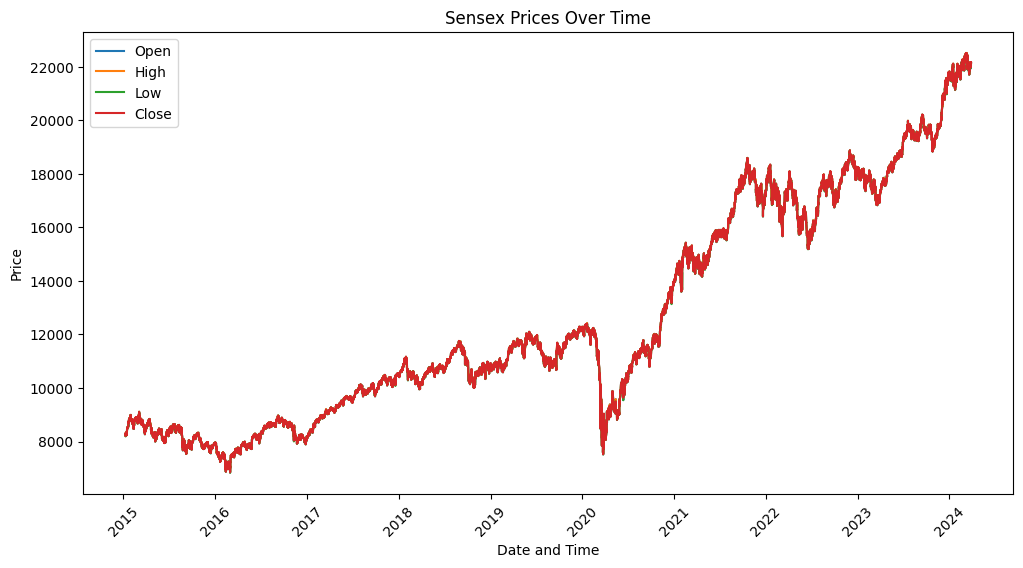

In [10]:
# Plot Open, High, Low, Close prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='DateTime', y='Open', data=data, label='Open')
sns.lineplot(x='DateTime', y='High', data=data, label='High')
sns.lineplot(x='DateTime', y='Low', data=data, label='Low')
sns.lineplot(x='DateTime', y='Close', data=data, label='Close')
plt.xlabel('Date and Time')
plt.ylabel('Price')
plt.title('Sensex Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


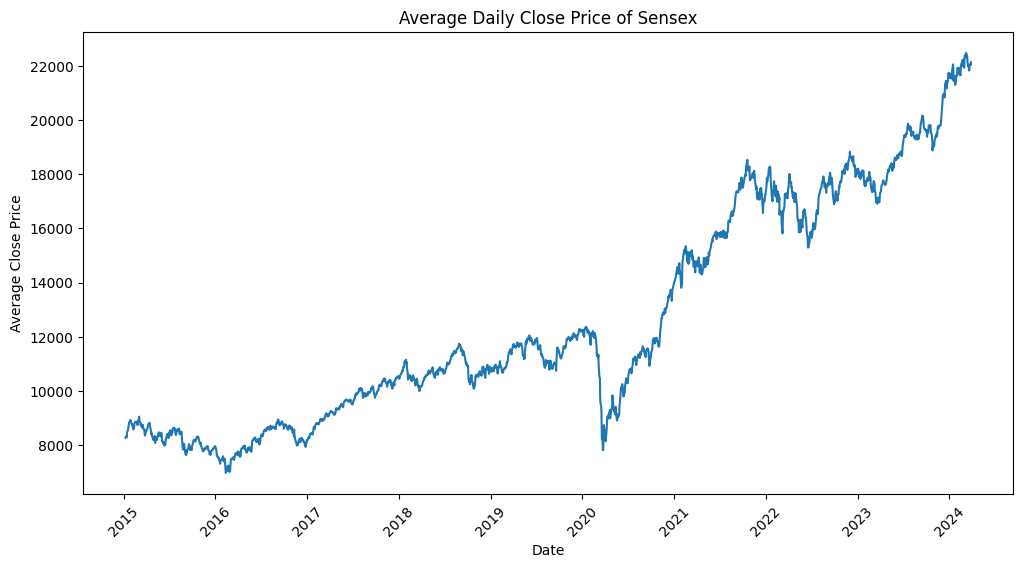

In [11]:
# Plot daily average Close prices
daily_avg_close = data.groupby(pd.Grouper(key='DateTime', freq='D'))['Close'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_avg_close.index, y=daily_avg_close.values)
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.title('Average Daily Close Price of Sensex')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


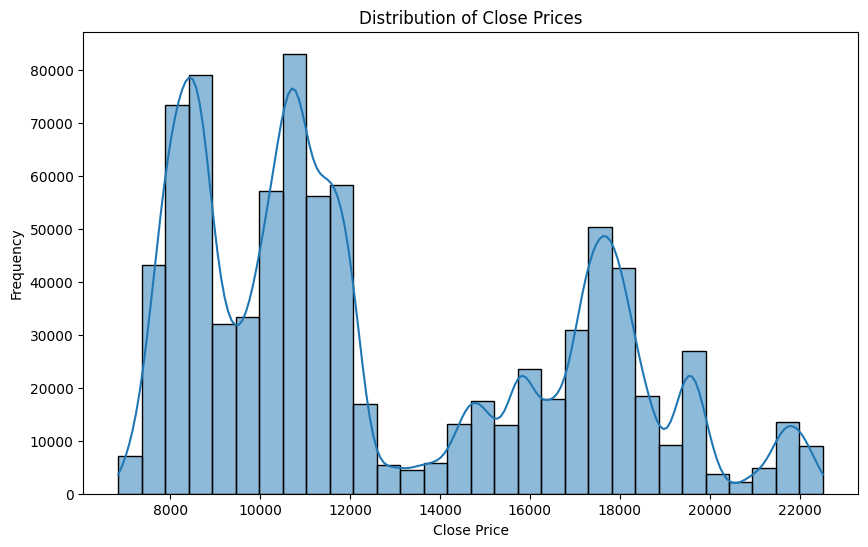

In [12]:
# Plot distribution of Close prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=30, kde=True)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Close Prices')
plt.show()

In [13]:
# Extract 'Close' prices for LSTM
close_prices = data['Close'].values.reshape(-1, 1)

In [14]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)

In [15]:
# Split data into train and test sets
train_size = int(len(scaled_close_prices) * 0.8)
test_size = len(scaled_close_prices) - train_size
train_data, test_data = scaled_close_prices[0:train_size,:], scaled_close_prices[train_size:len(scaled_close_prices),:]

In [16]:
# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [17]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
10650/10650 ━━━━━━━━━━━━━━━━━━━━ 132s 12ms/step - loss: 3.2382e-04 - val_loss: 4.0660e-06
Epoch 2/10
10650/10650 ━━━━━━━━━━━━━━━━━━━━ 127s 12ms/step - loss: 3.4617e-06 - val_loss: 6.2806e-06
Epoch 3/10
10650/10650 ━━━━━━━━━━━━━━━━━━━━ 126s 12ms/step - loss: 1.6379e-06 - val_loss: 8.0992e-06
Epoch 4/10
10650/10650 ━━━━━━━━━━━━━━━━━━━━ 126s 12ms/step - loss: 1.3296e-06 - val_loss: 1.2129e-05
Epoch 5/10
10650/10650 ━━━━━━━━━━━━━━━━━━━━ 126s 12ms/step - loss: 1.0989e-06 - val_loss: 6.7086e-05
Epoch 6/10
10650/10650 ━━━━━━━━━━━━━━━━━━━━ 126s 12ms/step - loss: 1.3752e-06 - val_loss: 8.2768e-06
Epoch 7/10
10650/10650 ━━━━━━━━━━━━━━━━━━━━ 142s 12ms/step - loss: 7.8457e-07 - val_loss: 2.5674e-06
Epoch 8/10
10650/10650 ━━━━━━━━━━━━━━━━━━━━ 126s 12ms/step - loss: 6.4372e-07 - val_loss: 2.3024e-06
Epoch 9/10
10650/10650 ━━━━━━━━━━━━━━━━━━━━ 126s 12ms/step - loss: 6.3111e-07 - val_loss: 9.5721e-06
Epoch 10/10
10650/10650 ━━━━━━━━━━━━━━━━━━━━ 126s 12ms/step - loss: 7.1055e-07 - val_loss: 

In [20]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

21299/21299 ━━━━━━━━━━━━━━━━━━━━ 89s 4ms/step
5323/5323 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step


In [21]:
# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

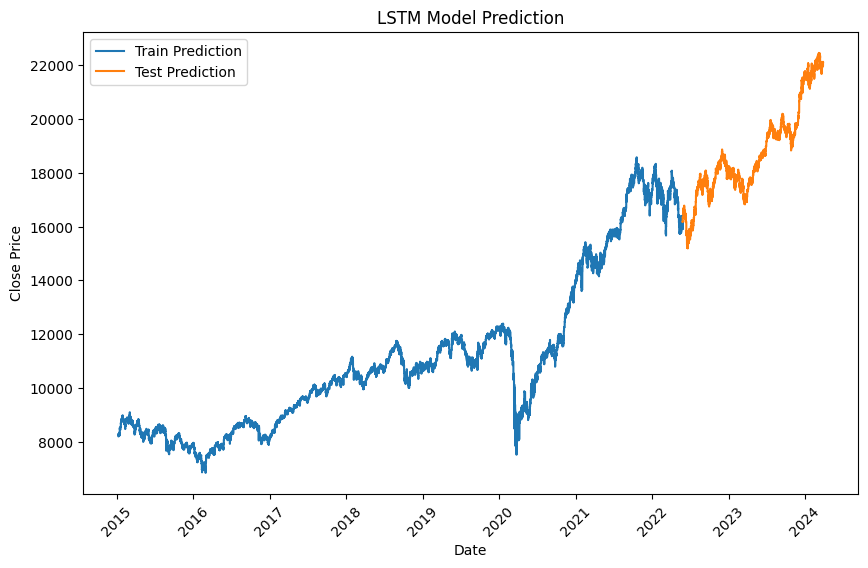

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['DateTime'][time_step:len(train_predict)+time_step], train_predict, label='Train Prediction')
plt.plot(data['DateTime'][len(train_predict)+(2*time_step)+1:len(train_predict)+len(test_predict)+(2*time_step)+1], test_predict, label='Test Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()